In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('./ySanFran.csv')
df2 = pd.read_csv('./yBeijing.csv')

In [3]:
del df1['idPartenza']
del df1['idArrivo']
del df2['idPartenza']
del df2['idArrivo']

# Train & test split (SanFran vs Beijing)

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
class_name = 'y'

attributes = [col for col in df1.columns if col != class_name]
X = df1[attributes].values
y=df1[class_name]


X1 = df2[attributes].values
y1=df2[class_name]

In [6]:
X_train = X
y_train = y

X_test = X1
y_test = y1

In [7]:
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

In [ ]:
errorMAE = []
errorMSE = []
errorR2 = []
print('start')
for k in range(1,15):
    knn = KNeighborsRegressor(n_neighbors=k,n_jobs=4,algorithm='kd_tree')
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    print(k)
    print('R2: %.3f' % r2_score(y_test, y_pred))
    print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
    print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))
    errorR2.append(r2_score(y_test,y_pred)) 

start
1
R2: 0.028
MSE: 0.022
MAE: 0.003
2
R2: 0.025
MSE: 0.022
MAE: 0.003
3
R2: 0.023
MSE: 0.022
MAE: 0.003
4
R2: 0.020
MSE: 0.022
MAE: 0.003


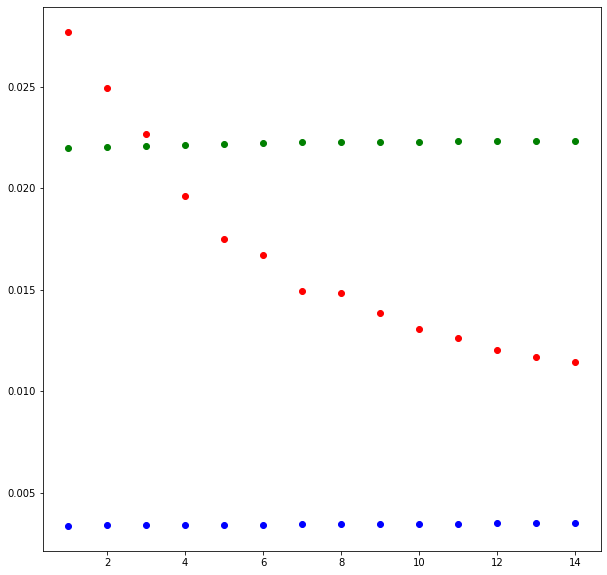

In [16]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,15),errorMAE,'bo')
plt.plot(range(1,15),errorMSE,'go')
plt.plot(range(1,15),errorR2,'ro')

In [1]:
MAE = [0.003, 0.003, 0.003, 0.003,0.003 ,0.003 ,0.003, 0.004,0.003,0.002,0.005,0.003,0.002,0.003,0.003,0.005,0.003,0.003,0.003]
 
MSE = [0.022,0.022,0.022,0.022,0.022,0.022,0.022,0.025,0.022,0.020,0.027,0.022,0.020,0.022,0.022,0.027,0.022,0.022,0.022]


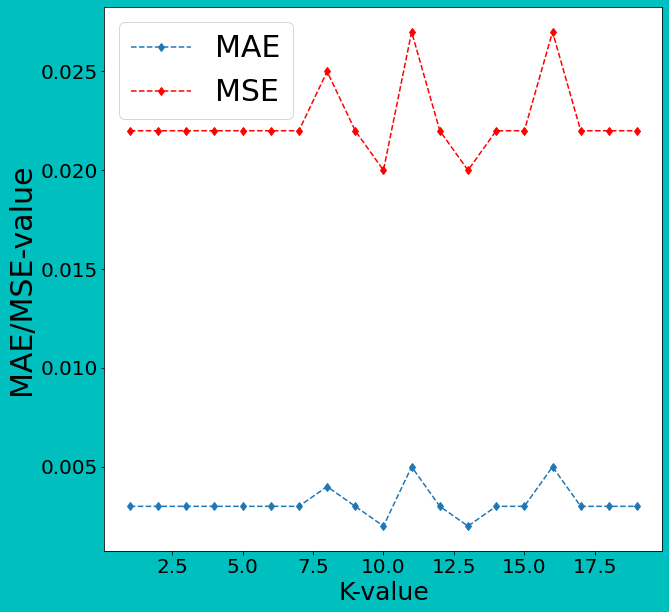

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.patch.set_facecolor('c')
plt.rcParams["figure.figsize"] = (10, 10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(range(1,20),MAE,'--d',label ='MAE')
plt.plot(range(1,20),MSE,'r--d',label= 'MSE')
plt.legend(loc="upper left",fontsize=30)
plt.xlabel('K-value',fontsize=25)
plt.ylabel('MAE/MSE-value',fontsize=30)
plt.show()


# Regressione Lineare

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [84]:
reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [85]:
y_pred = reg.predict(X_test_s)

In [86]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -270187495297457674910695424.000
MSE: 6106123086054593396736000.000
MAE: 504513805213.159


# Lasso

In [76]:
reg = Lasso()
reg.fit(X_train_s,y_train)

Lasso()

In [77]:
y_pred = reg.predict(X_test_s)

In [78]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.047
MSE: 0.024
MAE: 0.043


# Ridge

In [81]:
reg = Ridge()
reg.fit(X_train_s,y_train)

Ridge()

In [82]:
y_pred = reg.predict(X_test_s)

In [83]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -1.073
MSE: 0.047
MAE: 0.160


# Train & Test split (Beijing vs SanFrancisco)

In [1]:
import pandas as pd
df1 = pd.read_csv('./ySanFran.csv')
df2 = pd.read_csv('./yBeijing.csv')

In [2]:
del df1['idPartenza']
del df1['idArrivo']
del df2['idPartenza']
del df2['idArrivo']

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
class_name = 'y'

attributes = [col for col in df2.columns if col != class_name]
X = df2[attributes].values
y=df2[class_name]


X1 = df1[attributes].values
y1=df1[class_name]

In [5]:
X_train = X
y_train = y

X_test = X1
y_test = y1

In [6]:
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

In [9]:
errorMAE = []
errorMSE = []
errorR2 = []
print('start')
for k in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=k,n_jobs=4,algorithm='kd_tree')
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    print(k)
    print('R2: %.3f' % r2_score(y_test, y_pred))
    print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
    print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))
    errorR2.append(r2_score(y_test,y_pred))  

start
1
R2: -0.238
MSE: 506.882
MAE: 3.998
2
R2: -0.079
MSE: 441.963
MAE: 2.621
3
R2: -0.043
MSE: 427.296
MAE: 2.089
4
R2: -0.029
MSE: 421.213
MAE: 1.806
5
R2: -0.021
MSE: 417.914
MAE: 1.620
6
R2: -0.015
MSE: 415.782
MAE: 1.509
7
R2: -0.013
MSE: 414.739
MAE: 1.429
8
R2: -0.011
MSE: 414.157
MAE: 1.388
9
R2: -0.010
MSE: 413.776
MAE: 1.339
10
R2: -0.010
MSE: 413.406
MAE: 1.300
11
R2: -0.008
MSE: 412.822
MAE: 1.273
12
R2: -0.008
MSE: 412.622
MAE: 1.240
13
R2: -0.007
MSE: 412.435
MAE: 1.210
14
R2: -0.007
MSE: 412.308
MAE: 1.189
15
R2: -0.007
MSE: 412.245
MAE: 1.170
16
R2: -0.006
MSE: 412.090
MAE: 1.149
17
R2: -0.006
MSE: 412.017
MAE: 1.130
18
R2: -0.006
MSE: 411.899
MAE: 1.111
19
R2: -0.006
MSE: 411.857
MAE: 1.100


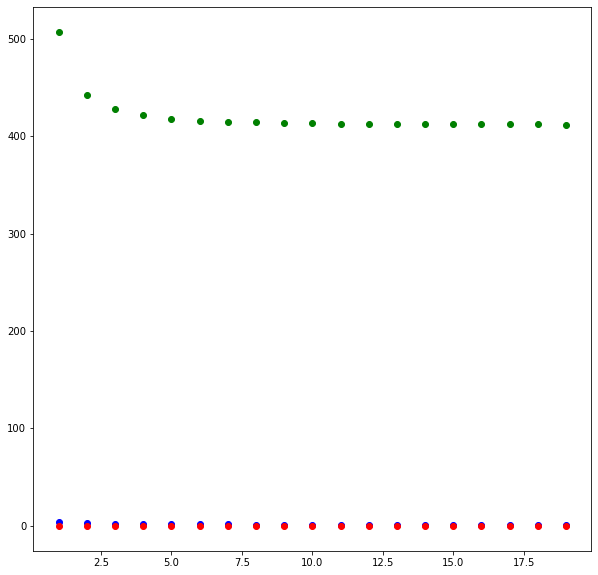

In [28]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,20),errorMAE,'bo')
plt.plot(range(1,20),errorMSE,'go')
plt.plot(range(1,20),errorR2,'ro')

In [8]:
 
MAE = [3.998,2.621,2.089,1.806,1.620,1.509,1.429,1.388,1.339,1.300,1.273,1.240,1.210,1.189,1.170,1.149,1.130,1.111,1.100]



MSE =[ 506.882, 441.963, 427.296, 421.213, 417.914, 415.782, 414.739, 414.157, 413.776, 413.406, 412.822, 412.622, 412.435,412.308, 412.245, 412.090, 412.017, 411.899, 411.857]

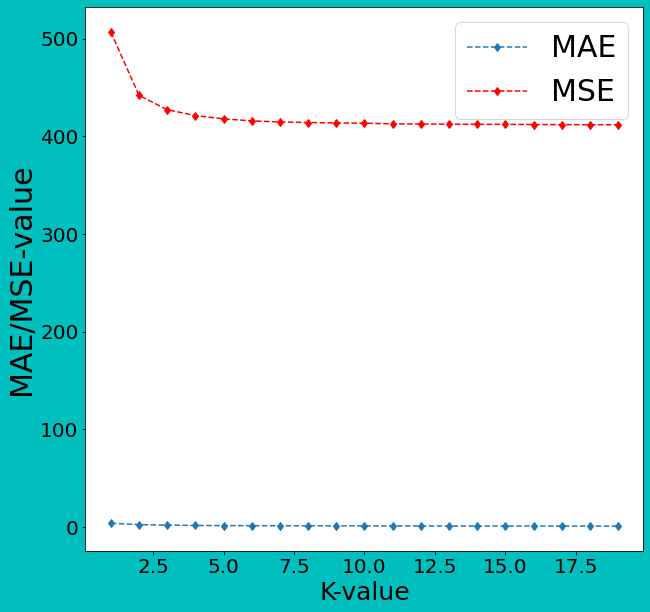

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.patch.set_facecolor('c')
plt.rcParams["figure.figsize"] = (10, 10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(range(1,20),MAE,'--d',label ='MAE')
plt.plot(range(1,20),MSE,'r--d',label= 'MSE')
plt.legend(loc="upper right",fontsize=30)
plt.xlabel('K-value',fontsize=25)
plt.ylabel('MAE/MSE-value',fontsize=30)
plt.show()


In [9]:
reg = LinearRegression()
reg.fit(X_train_s,y_train)

LinearRegression()

In [10]:
y_pred = reg.predict(X_test_s)

In [11]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -5337596896519081951232.000
MSE: 2185705733475422909235200.000
MAE: 592935924649.408


In [ ]:
# Lasso

In [13]:
reg = Lasso()
reg.fit(X_train_s,y_train)

Lasso()

In [14]:
y_pred = reg.predict(X_test_s)

In [15]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 409.514
MAE: 0.154


In [ ]:
# Ridge

In [16]:
reg = Ridge()
reg.fit(X_train_s,y_train)

Ridge()

In [17]:
y_pred = reg.predict(X_test_s)

In [18]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.006
MSE: 406.926
MAE: 0.206


# Transfer Learning

In [1]:
#import i dataframe di Pechino e San Fran
import pandas as pd
df2CentroSanFran = pd.read_csv('./../San-Francisco/TransferLearning/dfCentroSanFran.csv')
df2CentroBeijing = pd.read_csv('./../PECHINO/TransferLearning/dfCentroBeijing.csv')

df2NordSanFran = pd.read_csv('./../San-Francisco/TransferLearning/dfNordSanFran.csv')
df2NordBeijing = pd.read_csv('./../PECHINO/TransferLearning/dfNordBeijing.csv')

df2EstBeijing = pd.read_csv('./../PECHINO/TransferLearning/dfEstBeijing.csv')
df2SudSanFran = pd.read_csv('./../San-Francisco/TransferLearning/dfSudSaFran.csv')

In [2]:
del df2CentroBeijing['Unnamed: 0']
del df2CentroSanFran['Unnamed: 0']
del df2EstBeijing['Unnamed: 0']
del df2NordBeijing['Unnamed: 0']
del df2NordSanFran['Unnamed: 0']
del df2SudSanFran['Unnamed: 0']

# Train and Test (SUDSanFran vs CENTROBeijing)

In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
class_name = 'y'

attributes = [col for col in df2SudSanFran.columns if col != class_name]
X = df2SudSanFran[attributes].values
y=df2SudSanFran[class_name]


X1 = df2CentroBeijing[attributes].values
y1=df2CentroBeijing[class_name]

In [17]:
X_train = X
y_train = y

X_test = X1
y_test = y1

In [18]:
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

In [19]:
errorMAE = []
errorMSE = []
errorR2 = []
print('start')
for k in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=k,n_jobs=4,algorithm='kd_tree')
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    print(k)
    print('R2: %.3f' % r2_score(y_test, y_pred))
    print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
    print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))
    errorR2.append(r2_score(y_test,y_pred))  

start
1
R2: -11.414
MSE: 0.599
MAE: 0.544
2
R2: -3.040
MSE: 0.195
MAE: 0.293
3
R2: -1.428
MSE: 0.117
MAE: 0.211
4
R2: -0.843
MSE: 0.089
MAE: 0.167
5
R2: -0.560
MSE: 0.075
MAE: 0.141
6
R2: -0.383
MSE: 0.067
MAE: 0.120
7
R2: -0.277
MSE: 0.062
MAE: 0.105
8
R2: -0.216
MSE: 0.059
MAE: 0.095
9
R2: -0.195
MSE: 0.058
MAE: 0.087
10
R2: -1.320
MSE: 0.112
MAE: 0.174
11
R2: -1.348
MSE: 0.113
MAE: 0.183
12
R2: -1.181
MSE: 0.105
MAE: 0.175
13
R2: -1.036
MSE: 0.098
MAE: 0.166
14
R2: -0.905
MSE: 0.092
MAE: 0.157
15
R2: -0.805
MSE: 0.087
MAE: 0.150
16
R2: -0.719
MSE: 0.083
MAE: 0.144
17
R2: -0.679
MSE: 0.081
MAE: 0.142
18
R2: -0.632
MSE: 0.079
MAE: 0.140
19
R2: -0.593
MSE: 0.077
MAE: 0.138


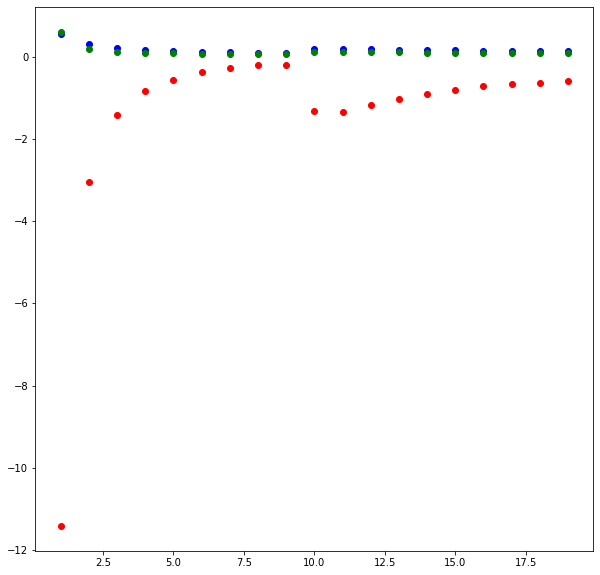

In [20]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,20),errorMAE,'bo')
plt.plot(range(1,20),errorMSE,'go')
plt.plot(range(1,20),errorR2,'ro')

In [ ]:
# Linear regression

In [25]:
reg = LinearRegression()
reg.fit(X_train_s,y_train)

LinearRegression()

In [26]:
y_pred = reg.predict(X_test_s)

In [27]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -64400391998093341960962048.000
MSE: 3105061370461371353792512.000
MAE: 469916097991.066


In [ ]:
# Lasso

In [28]:
reg = Lasso()
reg.fit(X_train_s,y_train)
y_pred = reg.predict(X_test_s)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.017
MSE: 0.049
MAE: 0.041


In [ ]:
# Ridge

In [29]:
reg = Ridge()
reg.fit(X_train_s,y_train)
y_pred = reg.predict(X_test_s)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -1.444
MSE: 0.118
MAE: 0.158


# Train and Test (EstBeijing vs NordSanFran)

In [32]:
class_name = 'y'

attributes = [col for col in df2EstBeijing.columns if col != class_name]
X = df2EstBeijing[attributes].values
y=df2EstBeijing[class_name]


X1 = df2NordSanFran[attributes].values
y1=df2NordSanFran[class_name]

In [33]:
X_train = X
y_train = y

X_test = X1
y_test = y1

In [34]:
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

In [61]:
errorMAE = []
errorMSE = []
errorR2 = []
print('start')
for k in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=k,algorithm='kd_tree')
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    print(k)
    print('R2: %.3f' % r2_score(y_test, y_pred))
    print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
    print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))
    errorR2.append(r2_score(y_test,y_pred))  

start
1
R2: -4999.229
MSE: 397.639
MAE: 14.254
2
R2: -1367.491
MSE: 108.828
MAE: 7.818
3
R2: -604.196
MSE: 48.128
MAE: 5.197
4
R2: -342.807
MSE: 27.341
MAE: 3.946
5
R2: -218.113
MSE: 17.425
MAE: 3.148
6
R2: -162.175
MSE: 12.976
MAE: 2.712
7
R2: -119.984
MSE: 9.621
MAE: 2.336
8
R2: -91.349
MSE: 7.344
MAE: 2.039
9
R2: -71.776
MSE: 5.787
MAE: 1.811
10
R2: -58.269
MSE: 4.713
MAE: 1.634
11
R2: -48.335
MSE: 3.923
MAE: 1.492
12
R2: -40.458
MSE: 3.297
MAE: 1.373
13
R2: -34.271
MSE: 2.805
MAE: 1.266
14
R2: -30.870
MSE: 2.534
MAE: 1.204
15
R2: -26.991
MSE: 2.226
MAE: 1.127
16
R2: -23.626
MSE: 1.958
MAE: 1.057
17
R2: -20.810
MSE: 1.734
MAE: 0.996
18
R2: -18.495
MSE: 1.550
MAE: 0.942
19
R2: -16.601
MSE: 1.400
MAE: 0.895


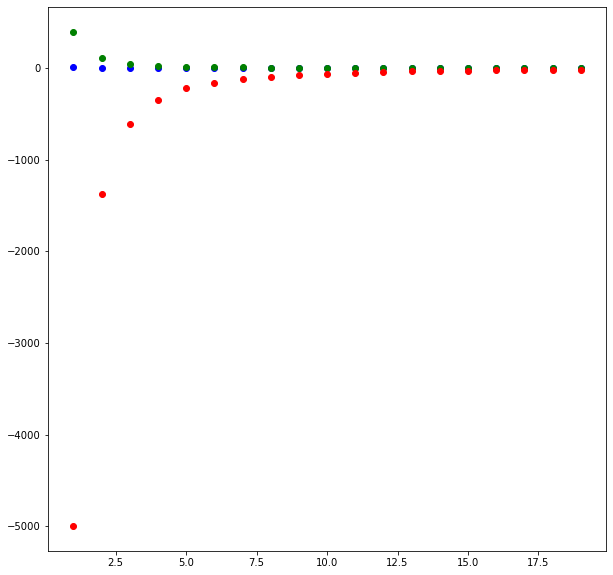

In [74]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,20),errorMAE,'bo')
plt.plot(range(1,20),errorMSE,'go')
plt.plot(range(1,20),errorR2,'ro')

In [ ]:
# Linear regression

In [35]:
reg = LinearRegression()
reg.fit(X_train_s,y_train)
y_pred = reg.predict(X_test_s)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -2681534624767817275683110912.000
MSE: 213246779432155377706205184.000
MAE: 9125025037832.828


In [36]:
# Lasso

In [37]:
reg = Lasso()
reg.fit(X_train_s,y_train)
y_pred = reg.predict(X_test_s)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.023
MSE: 0.081
MAE: 0.049


In [ ]:
# Ridge

In [38]:
reg = Ridge()
reg.fit(X_train_s,y_train)
y_pred = reg.predict(X_test_s)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -11.271
MSE: 0.976
MAE: 0.713


# Train and Test (NordSanFran vs NordBeijing)

In [39]:
class_name = 'y'

attributes = [col for col in df2NordSanFran.columns if col != class_name]
X = df2NordSanFran[attributes].values
y=df2NordSanFran[class_name]


X1 = df2NordBeijing[attributes].values
y1=df2NordBeijing[class_name]

In [40]:
X_train = X
y_train = y

X_test = X1
y_test = y1

In [41]:
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

In [101]:
errorMAE = []
errorMSE = []
errorR2 = []
print('start')
for k in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=k,algorithm='kd_tree')
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    print(k)
    print('R2: %.3f' % r2_score(y_test, y_pred))
    print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
    print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))
    errorR2.append(r2_score(y_test,y_pred)) 

start
1
R2: 1.000
MSE: 0.000
MAE: 0.000
2
R2: 1.000
MSE: 0.000
MAE: 0.000
3
R2: 1.000
MSE: 0.000
MAE: 0.000
4
R2: 1.000
MSE: 0.000
MAE: 0.000
5
R2: 1.000
MSE: 0.000
MAE: 0.000
6
R2: 1.000
MSE: 0.000
MAE: 0.000
7
R2: 1.000
MSE: 0.000
MAE: 0.000
8
R2: 1.000
MSE: 0.000
MAE: 0.000
9
R2: 1.000
MSE: 0.000
MAE: 0.000
10
R2: 1.000
MSE: 0.000
MAE: 0.000
11
R2: 1.000
MSE: 0.000
MAE: 0.000
12
R2: 1.000
MSE: 0.000
MAE: 0.000
13
R2: 1.000
MSE: 0.000
MAE: 0.000
14
R2: 1.000
MSE: 0.000
MAE: 0.000
15
R2: 1.000
MSE: 0.000
MAE: 0.000
16
R2: 1.000
MSE: 0.000
MAE: 0.000
17
R2: 1.000
MSE: 0.000
MAE: 0.000
18
R2: 1.000
MSE: 0.000
MAE: 0.000
19
R2: 1.000
MSE: 0.000
MAE: 0.000


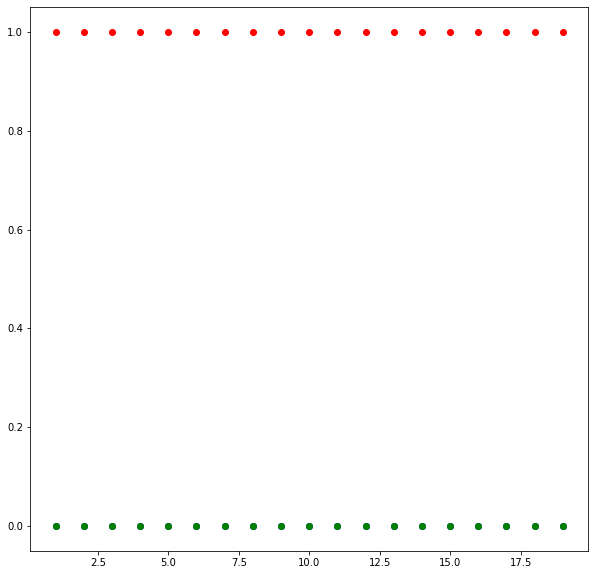

In [102]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,20),errorMAE,'bo')
plt.plot(range(1,20),errorMSE,'go')
plt.plot(range(1,20),errorR2,'ro')

In [42]:
# Linear Regression

In [43]:
reg = LinearRegression()
reg.fit(X_train_s,y_train)
y_pred = reg.predict(X_test_s)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.000
MSE: 925224512479576.625
MAE: 8681172.568


In [44]:
# Lasso

In [45]:
reg = Lasso()
reg.fit(X_train_s,y_train)
y_pred = reg.predict(X_test_s)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.000
MSE: 0.002
MAE: 0.046


In [46]:
# Ridge

In [47]:
reg = Ridge()
reg.fit(X_train_s,y_train)
y_pred = reg.predict(X_test_s)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.000
MSE: 0.049
MAE: 0.105


# Train & Test (CentroSanFran-CentroBeijing)

In [12]:
class_name = 'y'

attributes = [col for col in df2CentroSanFran.columns if col != class_name]
X = df2CentroSanFran[attributes].values
y=df2CentroSanFran[class_name]


X1 = df2CentroBeijing[attributes].values
y1=df2CentroBeijing[class_name]

In [13]:
X_train = X
y_train = y

X_test = X1
y_test = y1

In [14]:
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

In [15]:
errorMAE = []
errorMSE = []
errorR2 = []
print('start')
for k in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=k,algorithm='kd_tree')
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    print(k)
    print('R2: %.3f' % r2_score(y_test, y_pred))
    print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
    print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))
    errorR2.append(r2_score(y_test,y_pred)) 

start
1
R2: -0.013
MSE: 0.049
MAE: 0.008
2
R2: 0.012
MSE: 0.048
MAE: 0.008
3
R2: 0.015
MSE: 0.047
MAE: 0.008
4
R2: 0.011
MSE: 0.048
MAE: 0.008
5
R2: 0.009
MSE: 0.048
MAE: 0.009
6
R2: 0.001
MSE: 0.048
MAE: 0.009
7
R2: -0.002
MSE: 0.048
MAE: 0.009
8
R2: 0.001
MSE: 0.048
MAE: 0.009
9
R2: 0.002
MSE: 0.048
MAE: 0.009
10
R2: 0.003
MSE: 0.048
MAE: 0.009
11
R2: 0.004
MSE: 0.048
MAE: 0.010
12
R2: 0.006
MSE: 0.048
MAE: 0.010
13
R2: 0.008
MSE: 0.048
MAE: 0.010
14
R2: 0.009
MSE: 0.048
MAE: 0.010
15
R2: 0.009
MSE: 0.048
MAE: 0.010
16
R2: 0.010
MSE: 0.048
MAE: 0.010
17
R2: 0.010
MSE: 0.048
MAE: 0.010
18
R2: 0.011
MSE: 0.048
MAE: 0.010
19
R2: 0.012
MSE: 0.048
MAE: 0.010


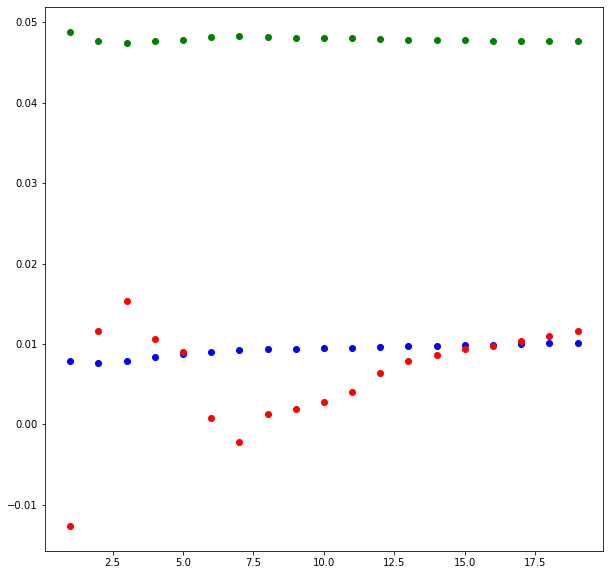

In [16]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,20),errorMAE,'bo')
plt.plot(range(1,20),errorMSE,'go')
plt.plot(range(1,20),errorR2,'ro')